In [1]:
import pandas as pd

In [2]:
#pip install pyarrow

In [3]:
data = pd.read_csv('emails_1.csv', low_memory=False)

In [4]:
data = data.sample(n=5000)


In [5]:
data.sample(5)

,text,spam
3516,Subject: telephone interview with the enron co...,0
3439,"Subject: re : copy room kevin , you have ful...",0
706,"Subject: urgent response dear sir / madam , ...",1
3793,Subject: long - term volatility curves grant ...,0
4866,Subject: enron research and ebs engineering an...,0


In [6]:
#Checking the shape of Data
data.shape

(5000, 2)

In [7]:
#Checking Null Values in the data
data.isnull().sum()

text    0
spam    0
dtype: int64

In [8]:
data['spam'].unique()

array([0, 1])

In [9]:
data['spam'].value_counts()

0    3812
1    1188
Name: spam, dtype: int64

In [10]:
data.head()

,text,spam
1992,"Subject: re : lawyer ian , sorry for a delay...",0
821,Subject: http : / / www . efi . ie / http : /...,1
3114,Subject: contract agreement for energy derivat...,0
1620,Subject: re : alp presentation fyi vince - ...,0
4613,Subject: tw capacity options we ' re at the p...,0


In [11]:
#missing values
data.isnull().sum()

text    0
spam    0
dtype: int64

In [12]:
#duplicate values
data.duplicated().sum()

27

In [13]:
#remove duplicates
data = data.drop_duplicates(keep='first')

In [14]:
data.shape

(4973, 2)

EDA

In [15]:
data.rename(columns = {'text':'text', 'label':'spam'},
                         inplace = True)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['spam'] = le.fit_transform(data['spam'])

In [17]:
data.head()

,text,spam
1992,"Subject: re : lawyer ian , sorry for a delay...",0
821,Subject: http : / / www . efi . ie / http : /...,1
3114,Subject: contract agreement for energy derivat...,0
1620,Subject: re : alp presentation fyi vince - ...,0
4613,Subject: tw capacity options we ' re at the p...,0


In [18]:
data['spam'].value_counts()

0    3785
1    1188
Name: spam, dtype: int64

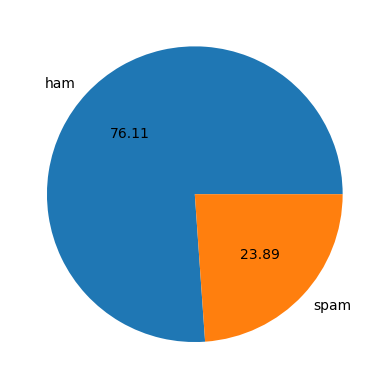

In [19]:
import matplotlib.pyplot as plt
plt.pie(data['spam'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [20]:
import nltk
import urllib.request

In [21]:
from nltk.tokenize import word_tokenize

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/kriti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
#number of characters
data['num_characters']=data['text'].apply(len)

In [24]:
#number of words
data['num_words']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
data.head()

,text,spam,num_characters,num_words
1992,"Subject: re : lawyer ian , sorry for a delay...",0,1896,412
821,Subject: http : / / www . efi . ie / http : /...,1,1348,266
3114,Subject: contract agreement for energy derivat...,0,722,136
1620,Subject: re : alp presentation fyi vince - ...,0,2204,541
4613,Subject: tw capacity options we ' re at the p...,0,2174,507


In [26]:
#tokenizing on basis of sentences
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x))) 

In [27]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4973.000000,4973.000000,4973.000000
mean,1567.215564,330.324955,19.406998
std,2069.147781,424.684723,30.738269
min,18.000000,5.000000,1.000000
25%,510.000000,102.000000,7.000000
50%,988.000000,213.000000,12.000000
75%,1905.000000,407.000000,22.000000
max,43952.000000,8479.000000,1248.000000


In [28]:
#ham
data[data['spam'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3785.000000,3785.000000,3785.000000
mean,1646.955614,349.929987,19.726552
std,2016.124421,415.718448,31.315797
min,27.000000,5.000000,1.000000
25%,585.000000,120.000000,7.000000
50%,1130.000000,242.000000,13.000000
75%,2043.000000,443.000000,23.000000
max,43952.000000,8479.000000,1248.000000


In [29]:
#spam
data[data['spam'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1188.000000,1188.000000,1188.000000
mean,1313.161616,267.862795,18.388889
std,2211.480502,446.542434,28.810193
min,18.000000,5.000000,1.000000
25%,403.000000,81.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1276.000000,262.250000,18.000000
max,28432.000000,6131.000000,438.000000


In [30]:
import seaborn as sns


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

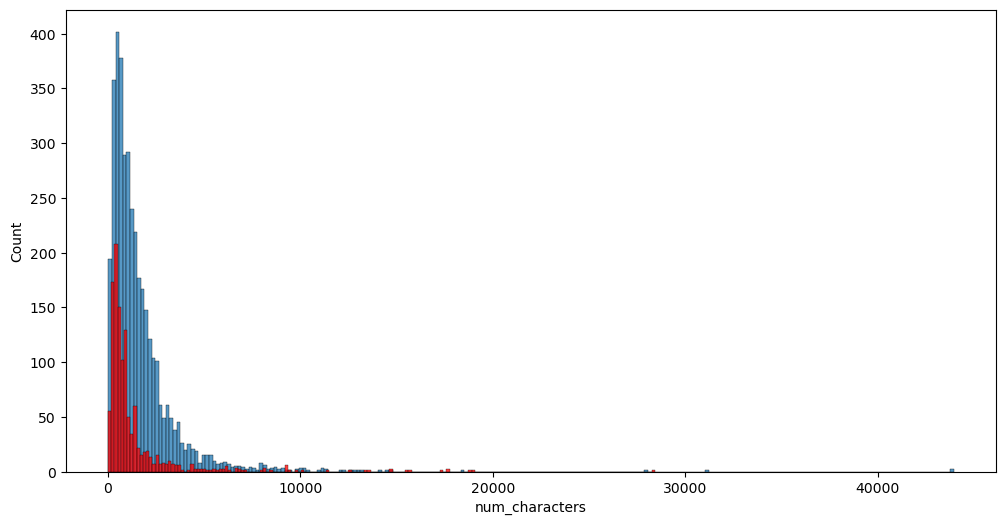

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['spam']==0]['num_characters'])
sns.histplot(data[data['spam']==1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

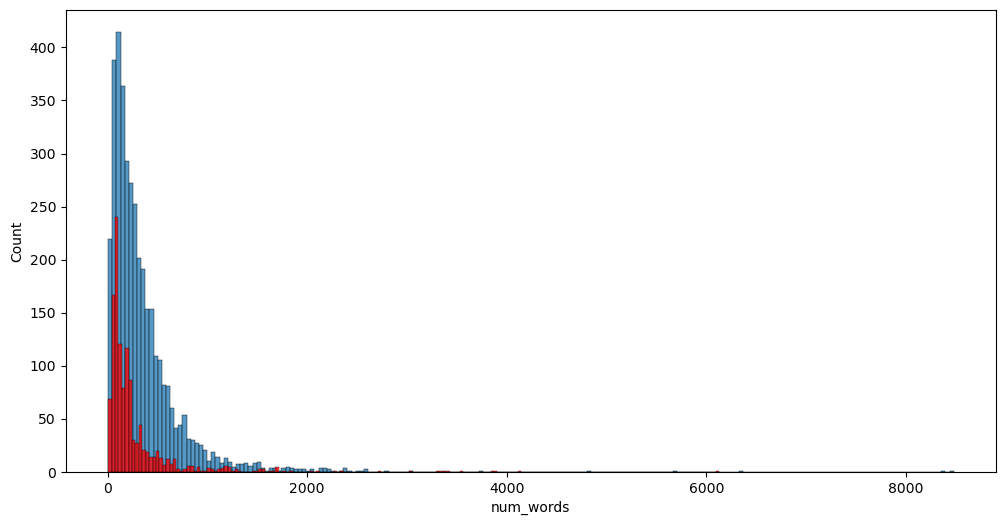

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['spam']==0]['num_words'])
sns.histplot(data[data['spam']==1]['num_words'], color='red')

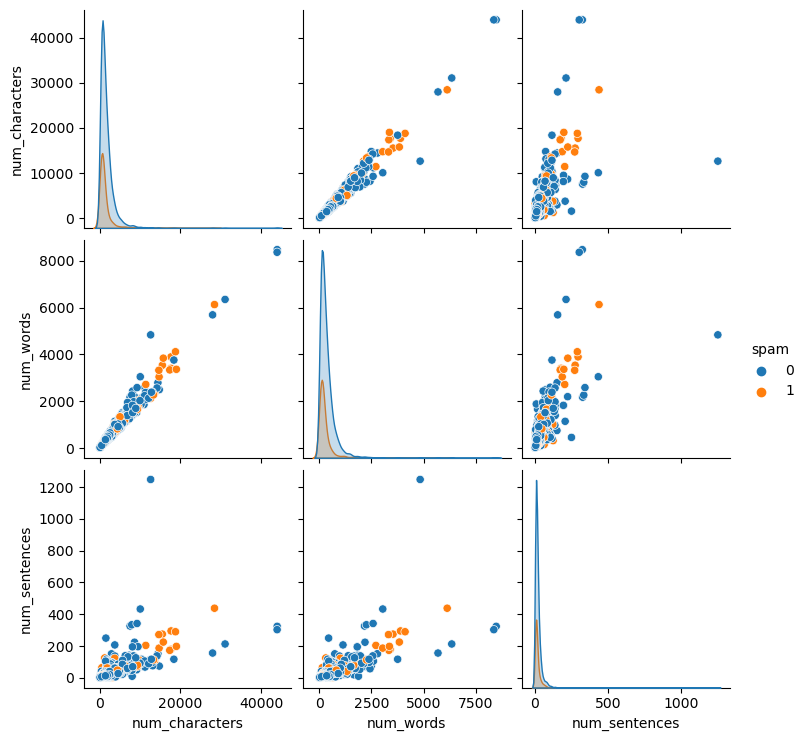

In [33]:
sns.pairplot(data, hue='spam')

<AxesSubplot:>

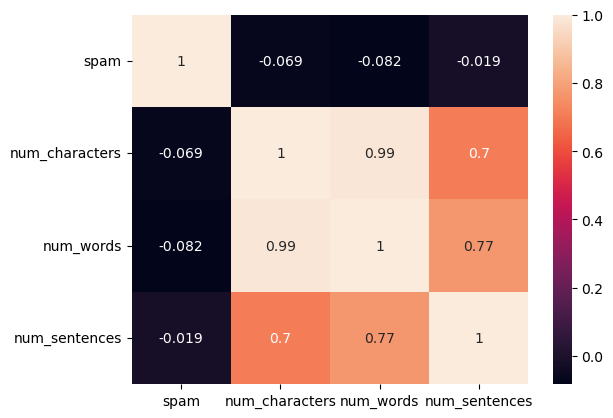

In [34]:
sns.heatmap(data.corr(), annot=True)

Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [36]:
from nltk.corpus import stopwords

In [37]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
# def transform_text(text):
#     text = text.lower()
#     text = nltk.word_tokenize(text)
    
#     y=[]
#     for i in text:
#         if i.isalnum():
#             y.append(i)
    
#     text = y[:] #mutatable so cloning has to be done
#     y.clear()
    
#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation and i !='subject':
#             y.append(i)
            
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         y.append(ps.stem(i))
        
        
#     return " ".join(y) #returning as string

In [39]:
stop_words = set(stopwords.words('english'))
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            if i not in stop_words and i not in string.punctuation and i !='subject':
                y.append(ps.stem(i))
        
        
    return " ".join(y) #returning as string


In [40]:
transform_text('Subject here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image')

'list clear benefit creativ hand made origin logo special done reflect distinct compani imag'

In [41]:
# transform_text(data['text'][2])

In [42]:
data['transformed_text']=data['text'].apply(transform_text)

In [43]:
data.head()

,text,spam,num_characters,num_words,num_sentences,transformed_text
1992,"Subject: re : lawyer ian , sorry for a delay...",0,1896,412,30,lawyer ian sorri delay respond current london ...
821,Subject: http : / / www . efi . ie / http : /...,1,1348,266,31,http www efi ie http www efi ie index 1998 07 ...
3114,Subject: contract agreement for energy derivat...,0,722,136,9,contract agreement energi deriv work john ambl...
1620,Subject: re : alp presentation fyi vince - ...,0,2204,541,29,alp present fyi vinc forward vinc j kaminski h...
4613,Subject: tw capacity options we ' re at the p...,0,2174,507,10,tw capac option point project solicit comment ...


In [44]:
#word cloud, will highlight the important words
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [45]:
# spam_wc = wc.generate(data[data['spam']==1]['transformed_text'].str.cat(sep=" "))


In [46]:
# plt.figure(figsize = (20,20)) 
# wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.spam == 1].text))
# plt.imshow(wc , interpolation = 'bilinear')
# plt.title("Spam Word Cloud")

In [47]:
# plt.figure(figsize=(10,10))
# plt.imshow(spam_wc)

In [48]:
# ham_wc = wc.generate(data[data['spam']==0]['transformed_text'].str.cat(sep=" "))

In [49]:
# plt.figure(figsize=(10,10))
# plt.imshow(ham_wc)

In [50]:
# spam_corpus = []
# for msg in data[data['spam']== 1]['transformed_text'].tolist():
#     for word in msg.split():
#         spam_corpus.append(word)

In [51]:
# len(spam_corpus)

In [52]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

In [53]:
# ham_corpus = []
# for msg in data[data['spam']== 0]['transformed_text'].tolist():
#     for word in msg.split():
#         ham_corpus.append(word)

In [54]:
# len(ham_corpus)

In [55]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

In [56]:
#using bag of words to vectorize
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (2, 2))

In [57]:
X = cv.fit_transform(data['transformed_text']).toarray()

In [58]:
X.shape

(4973, 291128)

In [59]:
y = data['spam'].values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)


In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [63]:
#making object of each
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       745
           1       0.98      0.93      0.95       250

    accuracy                           0.98       995
   macro avg       0.98      0.96      0.97       995
weighted avg       0.98      0.98      0.98       995

0.9778894472361809
[[740   5]
 [ 17 233]]
0.9789915966386554


In [65]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       745
           1       0.72      0.99      0.83       250

    accuracy                           0.90       995
   macro avg       0.86      0.93      0.88       995
weighted avg       0.93      0.90      0.91       995

0.9005025125628141
[[648  97]
 [  2 248]]
0.7188405797101449


In [66]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(classification_report(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       745
           1       0.78      0.30      0.44       250

    accuracy                           0.80       995
   macro avg       0.79      0.64      0.66       995
weighted avg       0.80      0.80      0.77       995

0.8040201005025126
[[724  21]
 [174  76]]
0.7835051546391752


In [67]:
#Using Tfidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range = (2, 2))

In [68]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [70]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       745
           1       0.98      0.92      0.95       250

    accuracy                           0.98       995
   macro avg       0.98      0.96      0.97       995
weighted avg       0.98      0.98      0.98       995

0.9758793969849247
[[740   5]
 [ 19 231]]
0.9788135593220338


In [71]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       745
           1       1.00      0.58      0.73       250

    accuracy                           0.89       995
   macro avg       0.94      0.79      0.83       995
weighted avg       0.91      0.89      0.88       995

0.8944723618090452
[[745   0]
 [105 145]]
1.0


In [72]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(classification_report(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       745
           1       0.78      0.30      0.44       250

    accuracy                           0.80       995
   macro avg       0.79      0.64      0.66       995
weighted avg       0.80      0.80      0.77       995

0.8040201005025126
[[724  21]
 [174  76]]
0.7835051546391752


In [73]:
#tfidf + bnb is working the best

In [74]:

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train,y_train)
y_pred4 = neigh.predict(X_test)
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print(accuracy_score(y_test, y_pred4))
print(precision_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       745
           1       0.98      0.94      0.96       250

    accuracy                           0.98       995
   macro avg       0.98      0.97      0.97       995
weighted avg       0.98      0.98      0.98       995

[[740   5]
 [ 14 236]]
0.9809045226130654
0.979253112033195


/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [75]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train,y_train)
y_pred5 = neigh.predict(X_test)
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))
print(accuracy_score(y_test, y_pred5))
print(precision_score(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       745
           1       0.98      0.90      0.94       250

    accuracy                           0.97       995
   macro avg       0.98      0.95      0.96       995
weighted avg       0.97      0.97      0.97       995

[[741   4]
 [ 24 226]]
0.9718592964824121
0.9826086956521739


/Users/kriti/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
y_pred6 = neigh.predict(X_test)
print(classification_report(y_test, y_pred6))
print(confusion_matrix(y_test, y_pred6))
print(accuracy_score(y_test, y_pred6))
print(precision_score(y_test, y_pred6))